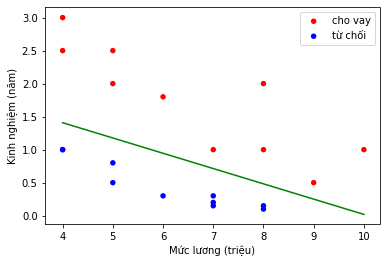

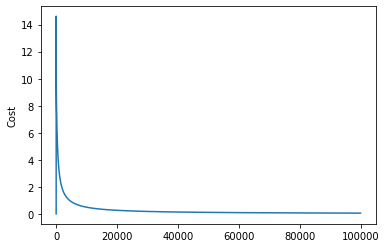

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N = data.shape[0]
x = data[:, 0:2].reshape(-1, 2)
y = data[:, 2].reshape(-1, 1)

# Vẽ data bằng scatter
x_cho_vay = x[y[:, 0]==1]
x_tu_choi = x[y[:, 0]==0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('Mức lương (triệu)')
plt.ylabel('Kinh nghiệm (năm)')

# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0., 0.1, 0.1]).reshape(-1, 1)

# Số lần lặp bước 2
numOfIteration = 100000
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.01

for i in range(1, numOfIteration):
    # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(y * np.log(y_predict) + (1-y) * np.log(1-y_predict))
    # Gradient descent
    w -= learning_rate * np.dot(x.T, y_predict-y)

# Vẽ đường phân cách
t = 0.6 # Xác suất cho vay
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

# loss
plt.plot(range(len(cost)), cost)
plt.ylabel("Cost")
plt.show()